In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [119]:
df=pd.read_csv('Cleaned_Algerian_forest_fire_dataset.csv')

In [120]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [121]:
## Drop Month, Dayp and Year
df.drop(['day','month','year'],axis=1,inplace=True)

In [122]:
df.head

<bound method NDFrame.head of      Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  \
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5   
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4   
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1   
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0   
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5   
..           ...  ..  ..   ...   ...   ...   ...  ...   ...  ...   
238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5   
239           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0   
240           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2   
241           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7   
242           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5   

          Classes  Region  
0     not fire          0  
1     not fire          0  
2     not fire          0  
3     not fire          0  
4     not fir

In [123]:
df['Classes'].value_counts

<bound method IndexOpsMixin.value_counts of 0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
238         fire   
239     not fire   
240     not fire   
241     not fire   
242    not fire    
Name: Classes, Length: 243, dtype: object>

In [124]:
## Encoding 
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [125]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [126]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [127]:
## Divide values to Independent and Dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [128]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [129]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [130]:
## Training Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [131]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [132]:
## Feature Selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

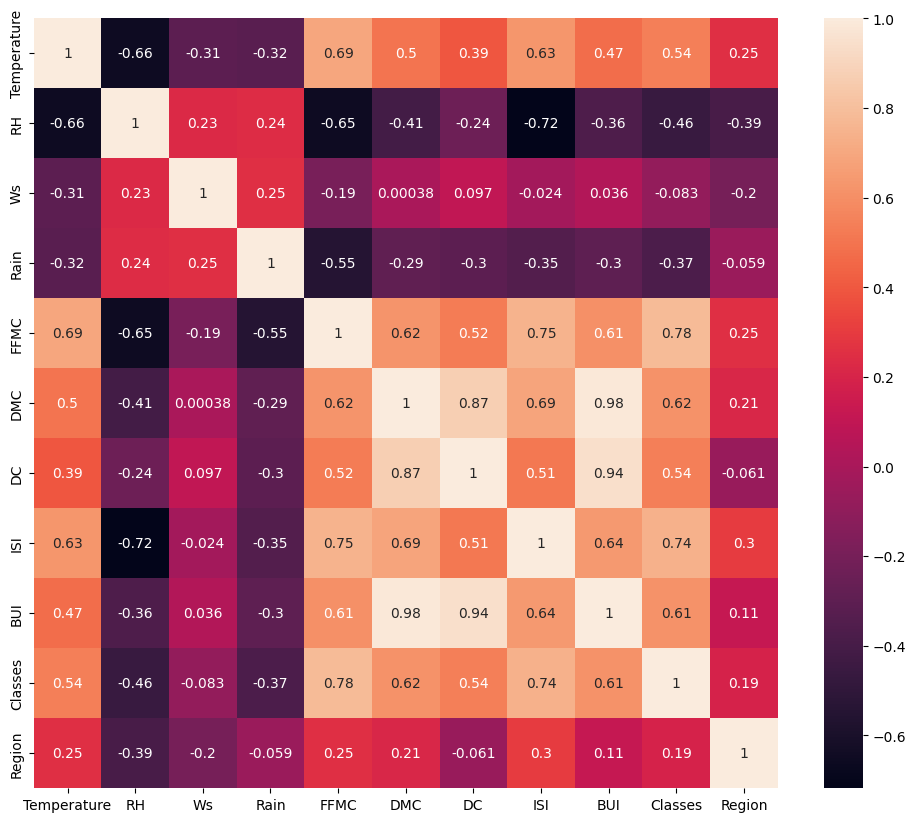

In [133]:
## Check for multi-correlinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [134]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [135]:
## Setting threshold
corr_features=correlation(X_train,0.78)

In [136]:
corr_features

{'BUI', 'Classes', 'DC'}

In [137]:
## Drop features when correlation above 0.78
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [138]:
X_train.shape, X_test.shape

((182, 8), (61, 8))

##  Feature Standardization

In [139]:
from sklearn.preprocessing import StandardScaler


In [140]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [141]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.88272888,
        -0.62963326, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.86687565,
        -0.93058524,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  0.61540157,
         2.7271388 ,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06504105,
        -1.06948615, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.37760309,
         0.5973248 ,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -1.01748135,
        -0.86113478, -0.98907071]])

## Box plot to see standard scaler

Text(0.5, 1.0, 'X_train After Scaling')

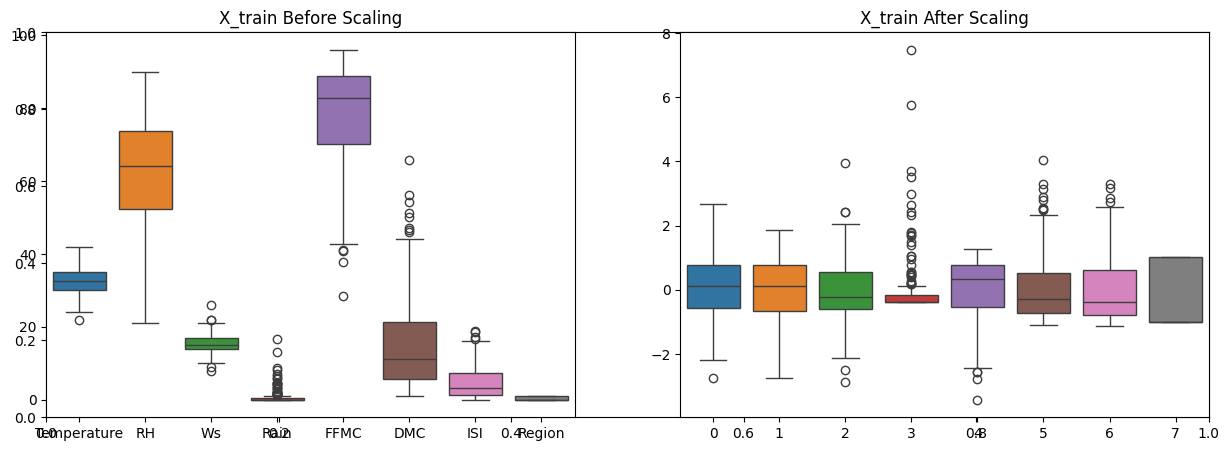

In [142]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Linear Regression Model

Mean Absolute Error 0.5806361642310041
R2 Score 0.9830321384727897


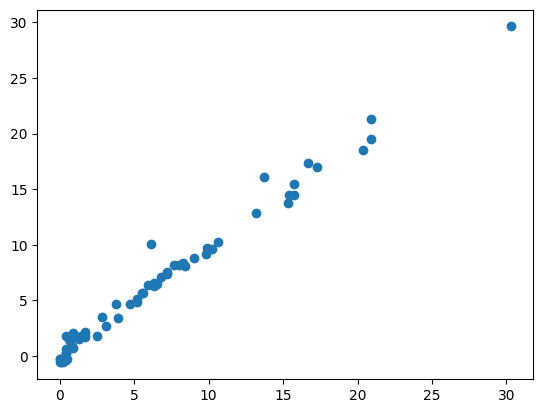

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean Absolute Error',mae)
print('R2 Score', score)

plt.scatter(y_test,y_pred)

## Lasso Regression

Mean Absolute Error 1.133175994914409
R2 Score 0.9492020263112388


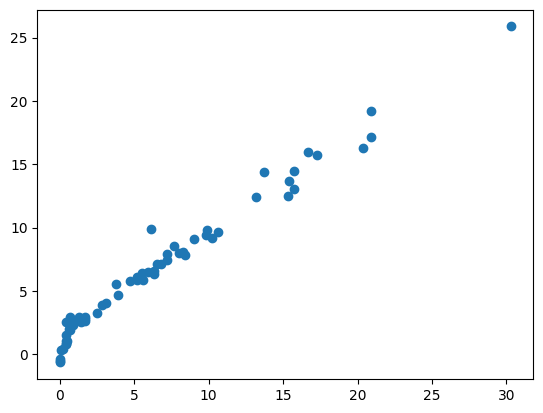

In [145]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean Absolute Error',mae)
print('R2 Score', score)

plt.scatter(y_test,y_pred) 

## Ridge Regression Model

Mean Absolute Error 0.5969613029130091
R2 Score 0.9824907652592585


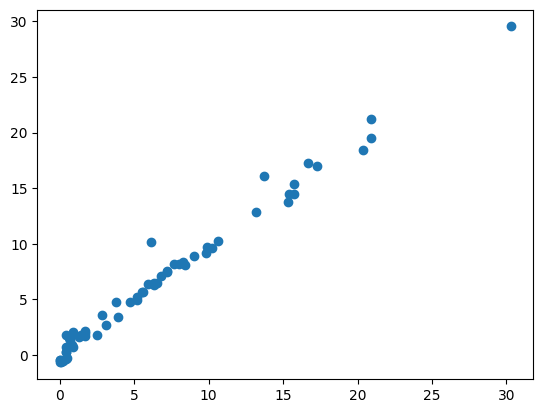

In [147]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean Absolute Error',mae)
print('R2 Score', score)

plt.scatter(y_test,y_pred) 

## ElasticNet Regression

Mean Absolute Error 1.928441451179673
R2 Score 0.868664603256521


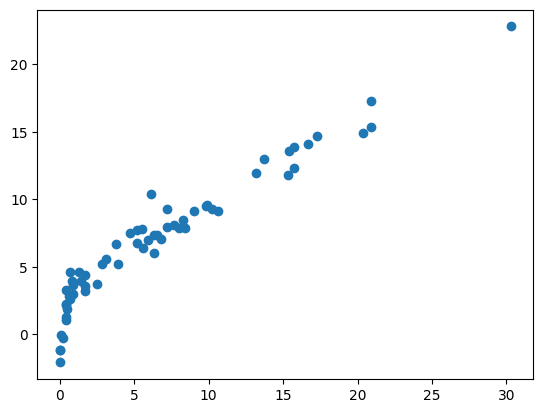

In [148]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Elastic=ElasticNet()
Elastic.fit(X_train_scaled, y_train)
y_pred=Elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean Absolute Error',mae)
print('R2 Score', score)

plt.scatter(y_test,y_pred) 

## Cross Validation Lasso

In [150]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [151]:
lassocv.predict(X_test_scaled)

array([ 8.08952031,  7.60634427, -0.23265137,  4.85376352,  6.64303299,
        1.85071189,  2.02905324,  7.50884393,  2.09918879,  3.54499811,
        0.71690527, 10.12577585,  9.27314139, 16.9852939 , 18.32770763,
        1.7118691 ,  1.65149733, -0.69890609,  7.18680807,  2.9168583 ,
        2.10112926,  0.22272815,  6.38582103,  0.18730216, 21.10321595,
        4.95691637,  5.73407458,  9.68896291, -0.84854545,  9.84270612,
        6.60390084, -0.28762084, 10.25249099, 14.41195231,  1.85133635,
        0.92040677,  1.85163023,  5.80915143, -0.67293229, -0.61138016,
        6.33872968,  2.2310956 ,  8.38514557, -0.90109748, 15.41278412,
        8.24248499,  8.3558967 ,  1.51809838, 12.98085178,  1.29519655,
       29.22354342,  5.33793198, 17.20273664, 19.3296297 , 13.7202024 ,
       16.01521006,  1.06760138,  8.99046251,  3.66660586, 14.41813208,
        5.07383409])

Mean Absolute Error 0.6297839301098621
R2 Score 0.981393944688068


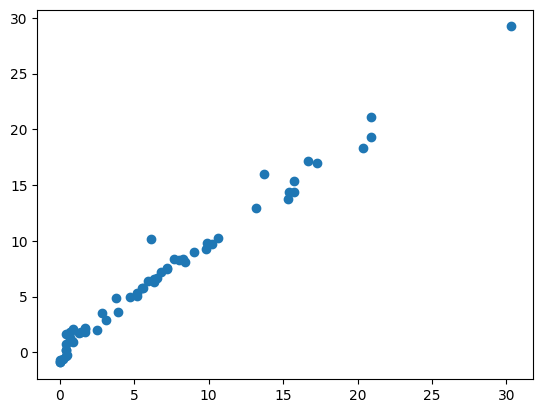

In [152]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean Absolute Error',mae)
print('R2 Score', score)

## Ridge Cross Validation

Mean Absolute Error 0.5969613029130091
R2 Score 0.9824907652592585


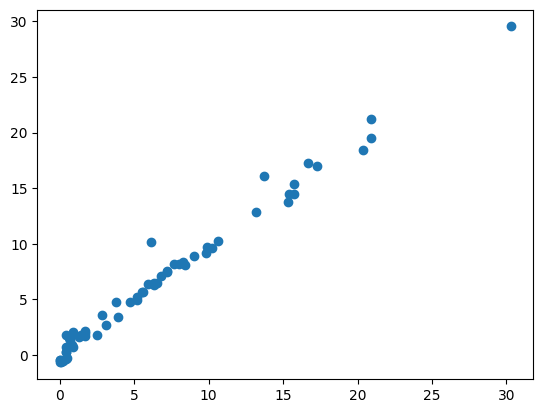

In [155]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean Absolute Error',mae)
print('R2 Score', score)

## ElasticNet Cross Validation

Mean Absolute Error 0.6716732201553721
R2 Score 0.9796396289421408


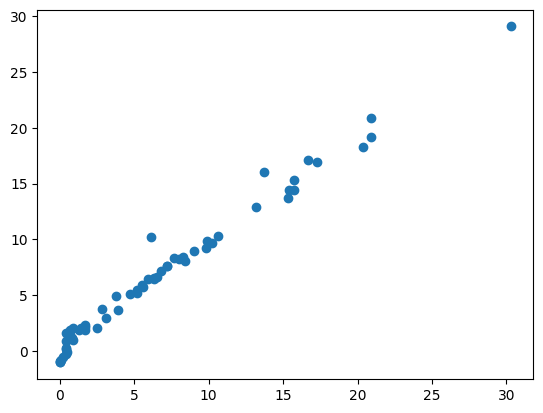

In [156]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv=ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled,y_train)
y_pred=elasticnetcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean Absolute Error',mae)
print('R2 Score', score)